<a href="https://colab.research.google.com/github/zeehayat/data-science/blob/main/Diabetes_Detection_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [2]:
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Explore data (visualizations, descriptive statistics)


In [3]:
# Data Splitting and Preprocessing
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
#KNN Classification and Training
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

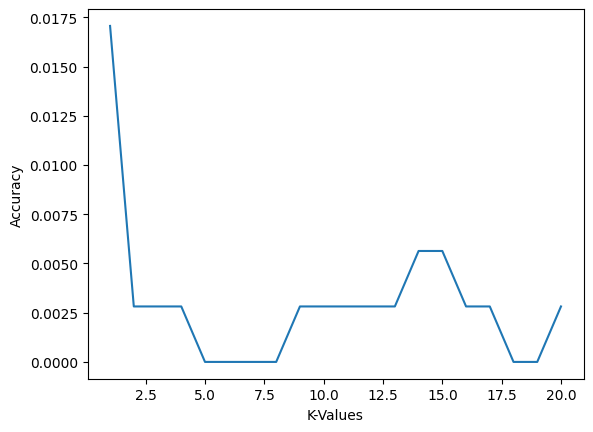

In [5]:
# Tuning K-Values

k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot k-values vs. cross-validation scores
plt.plot(k_values, cv_scores)
plt.xlabel("K-Values")
plt.ylabel("Accuracy")
plt.show()

# Select the best k-value based on the plot
best_k = 7  # Assuming 7 is the optimal k-value from the plot


In [6]:
# retraining with Optimal K-Value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=7)

In [7]:
# Prediction Evaluations and INterpretations
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize decision boundaries (optional, for visual understanding)


Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        25.0       0.00      0.00      0.00       0.0
        31.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       1.0
        39.0       0.00      0.00      0.00       0.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00      0.00      0.00       0.0
        44.0       0.00      0.00      0.00       0.0
        47.0       0.00      0.00      0.00       0.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        53.0       0.00      0.00      0.00       0.0
        55.0       0.00      0.00      0.00       0.0
        57.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#  Additional Considerations:

- Explore feature importance to understand which features contribute most to predictions.
- Consider dimensionality reduction techniques like PCA if dealing with many features.
- Address class imbalance if present in the dataset.
- Experiment with distance metrics other than Euclidean, such as Manhattan or Minkowski.
- Use weighted KNN for scenarios where nearby neighbors should have more influence.